# Chapter 15 Cluster Analysis

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Import Data

In [164]:
data = 'EastWestAirlinesCluster.csv'

df = pd.read_csv(data)

# Explore Data

In [165]:
# Add a name to index column for better understanding
df['row'] = [f'row{str(x)}' for x in range(0, len(df))]
df.set_index('row', inplace=True)

df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
row,,,,,,,,,,,,
row0,1,28143,0,1,1,1,174,1,0,0,7000,0
row1,2,19244,0,1,1,1,215,2,0,0,6968,0
row2,3,41354,0,1,1,1,4123,4,0,0,7034,0
row3,4,14776,0,1,1,1,500,1,0,0,6952,0
row4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [166]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, row0 to row3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 406.1+ KB


In [168]:
# Get null counts
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Scale Features

# Question 1 (1 pt)

## 1. Why do we need to scale continous variables before clustering?

## Scaling is necessary before clustering because it prevents domination by large-scale features: Clustering algorithms (e.g., K-Means, Hierarchical Clustering) work based on distance measures (e.g., Euclidean distance). If features are of different scales, variables with larger values (e.g., income in thousands vs. age in years) dominate the distance measures, leading to biased clustering.<br>
## Guarantees equal significance of features: Standardization guarantees all features make equal contributions towards cluster formation.<br>
## Improves convergence in algorithms: Some clustering algorithms (like K-Means) converge faster when features are scaled since the optimization process is smoother.

2. Show me top 5 rows of before and after scaling.

In [169]:

print("Top 5 rows Before Scaling:\n", df.head())

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


Top 5 rows Before Scaling:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
row                                                                            
row0    1    28143           0          1          1          1          174   
row1    2    19244           0          1          1          1          215   
row2    3    41354           0          1          1          1         4123   
row3    4    14776           0          1          1          1          500   
row4    5    97752           0          4          1          1        43300   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
row                                                                        
row0            1                  0                0               7000   
row1            2                  0                0               6968   
row2            4                  0                0               7034   
row3            1              

In [170]:
print("\nTop 5 rows After Scaling:\n", df_scaled.head())


Top 5 rows After Scaling:
         ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -1.735125 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767   
1 -1.734263 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767   
2 -1.733402 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767   
3 -1.732540 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767   
4 -1.731679  0.239678   -0.186299   1.409471  -0.098242  -0.062767   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.702786    -1.104065          -0.328603        -0.362168   
1    -0.701088    -0.999926          -0.328603        -0.362168   
2    -0.539253    -0.791649          -0.328603        -0.362168   
3    -0.689286    -1.104065          -0.328603        -0.362168   
4     1.083121     1.499394           1.154932         0.692490   

   Days_since_enroll    Award?  
0           1.395454 -0.766919  
1           1.379957 -0.766919  
2           1.411920 -0.766919  
3           1.37

# Question 2 (1 pt)

## Why do we need to remove the ID column?

## The ID column is useful for referencing records but should not be used for clustering.<br>
## Removing it ensures better feature selection and meaningful cluster formation.

In [171]:
# Select Numerical columns and scale them!
features = df.select_dtypes(include=[np.number])

# Remove ID column from features as it is not needed
features = features.drop('ID#', axis=1)

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [173]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index.to_list())

# Hierarchical Clustering

## Linkage

In [174]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [175]:
# Use single linkage method
linked = linkage(scaled_features_df, method='single', metric='euclidean')

# Question 3 (2pts)

## 1. Explain what single, complete methods do.

## Single Linkage Method:
Definition: The minimum distance between any point in one cluster and any point in the other cluster.
Effect: It forms long, chain-like clusters since only one close pair of points is needed for merging.
Strength: Preserves local structure and can detect elongated clusters.
Weakness: Noise and outlier sensitive, leading to premature merging of distant points.

## Complete Linkage Method:
Definition: The maximum distance between any point in one of the clusters and any point in the other cluster is the definition of two clusters' distance.
Effect: Forms tight, spherical clusters because merging occurs only when all points in two clusters are near each other.
Strength: Less sensitive to outliers and prevents elongated clusters.
Weakness: Can break natural clusters into smaller, artificial ones.

2. How does it affect Dendrogram?

Employ Single Linkage if you prefer to recover extended natural clusters but observe that it is sensitive to noise.
Use Complete Linkage for closely spaced, tight clusters because it reduces the influence of outliers.
Dendrograms represent these effects visually, with Single Linkage generating long chains and Complete Linkage generating more isolated groups.

## Dendrogram

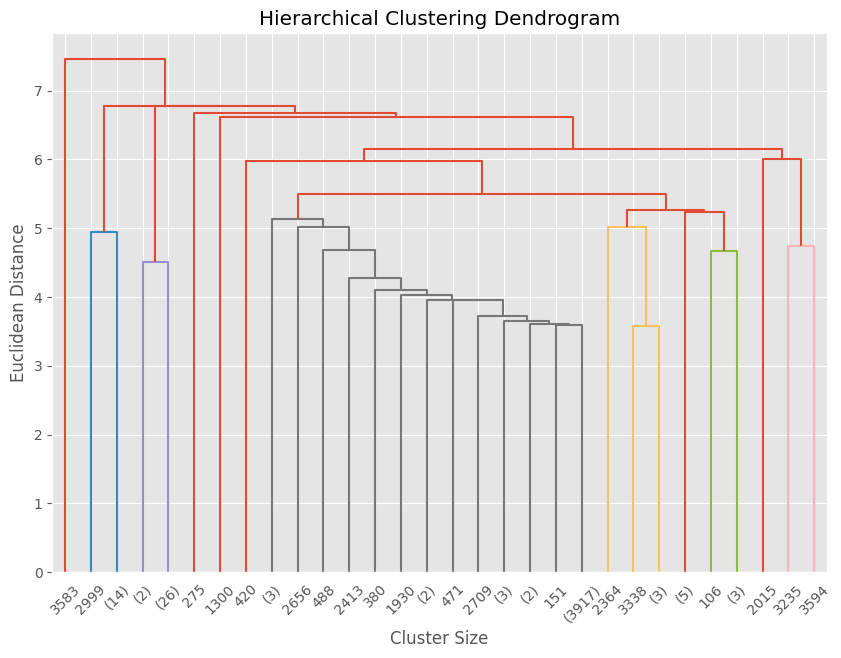

In [176]:
# Plot dendrogram truncating the tree with truncate_mode='lastp'
# We we don't use a truncate mode, you will get a very large dendrogram that is hard to read (You will plot every row essentially)

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', leaf_rotation=45)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Euclidean Distance')
plt.show()

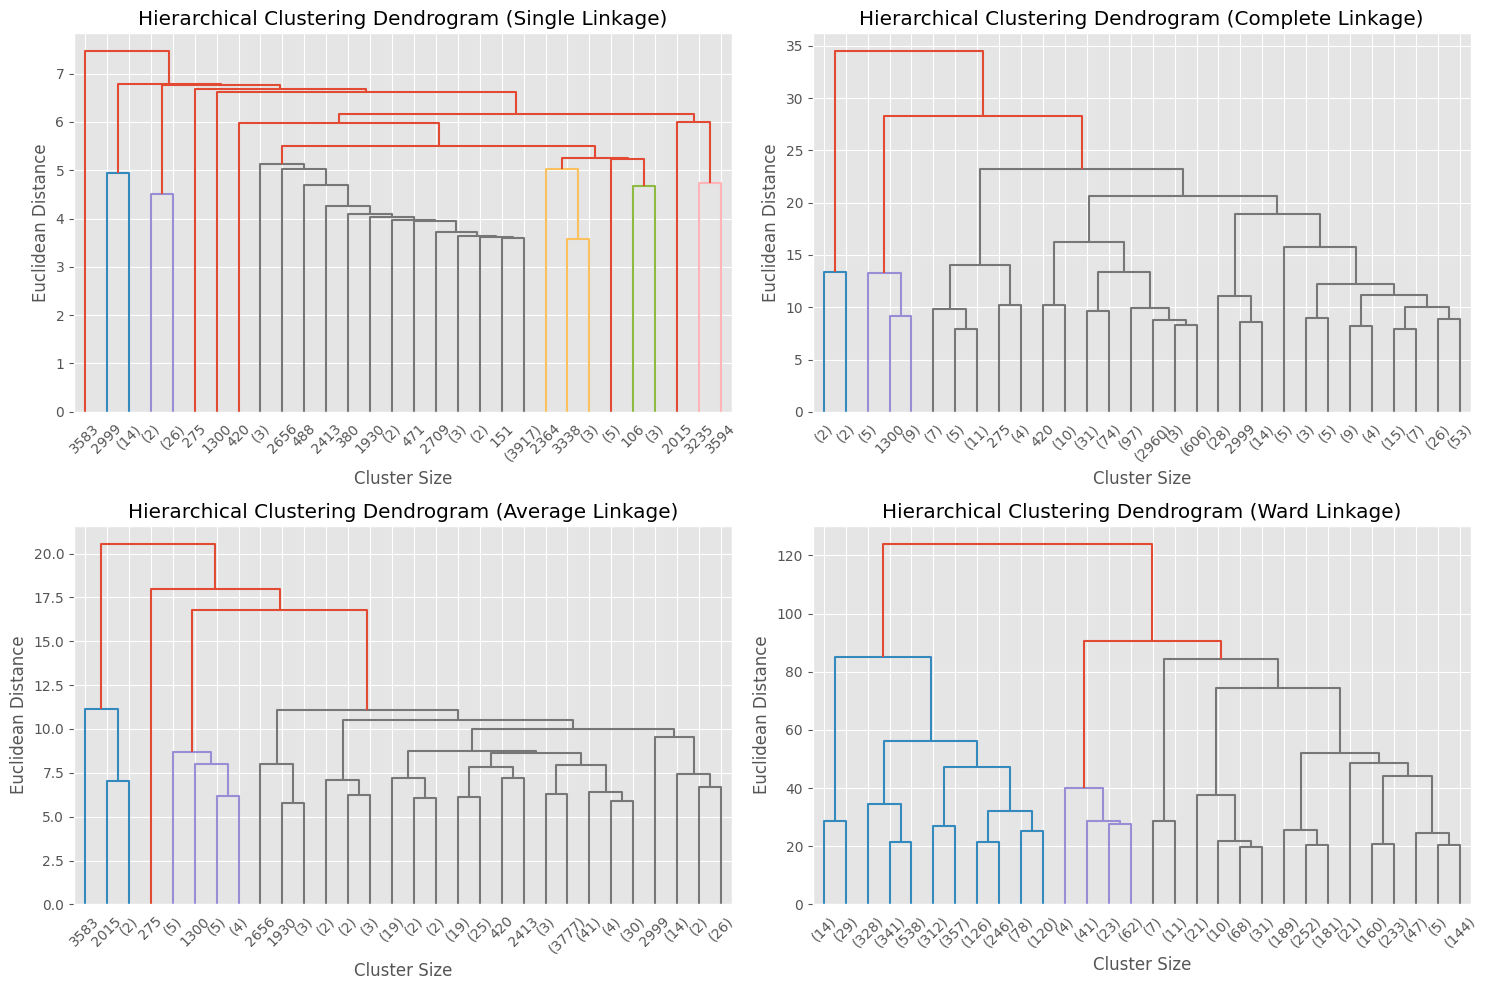

In [177]:
# Test different linkage methods to see how they affect the dendrogram

methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))

for idx, m in enumerate(methods):
    plt.subplot(2, 2, idx + 1)
    linked = linkage(scaled_features_df, method=m, metric='euclidean')
    dendrogram(
        linked
        ,truncate_mode='lastp'
        ,leaf_rotation=45
    )
    plt.title(f'Hierarchical Clustering Dendrogram ({m.capitalize()} Linkage)')
    plt.xlabel('Cluster Size')
    plt.ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()

# fcluster

You can use the `fcluster` function from `scipy.cluster.hierarchy` to assign cluster labels based on a chosen threshold

In [178]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold value (This will change the number of clusters you have)
threshold = 2

# Generate cluster labels using the 'distance' criterion
linked = linkage(scaled_features_df, method='single', metric='euclidean')
cluster_labels = fcluster(linked, t=threshold, criterion='distance')

# Count the unique clusters
num_clusters = len(np.unique(cluster_labels))
print("Number of clusters:", num_clusters)


Number of clusters: 144


# Question 4 (1pt)

## How many clusters are in the dataset when using complete as a method? (Use a threshold of 2)<br>

## Number of Clusters: 431

In [179]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold value (This will change the number of clusters you have)
threshold = 2

# Generate cluster labels using the 'distance' criterion
linked = linkage(scaled_features_df, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=threshold, criterion='distance')

# Count the unique clusters
num_clusters = len(np.unique(cluster_labels))
print("Number of clusters:", num_clusters)

Number of clusters: 431


In [180]:
# For loop through a range of threshold values to see how threshold affects the number of clusters
threshold_cluster_data = []

linked = linkage(scaled_features_df, method='complete', metric='euclidean')

for thres in range(1, 10):
    cluster_labels = fcluster(linked, t=thres, criterion='distance')
    num_clusters = len(np.unique(cluster_labels))
    threshold_cluster_data.append([thres, num_clusters])
    
pd.DataFrame(threshold_cluster_data, columns=['Threshold', 'Number of Clusters'])

,Threshold,Number of Clusters
0,1,1032
1,2,431
2,3,222
3,4,129
4,5,80
5,6,56
6,7,43
7,8,28
8,9,22


Number of clusters for threshold 5.5 is 67


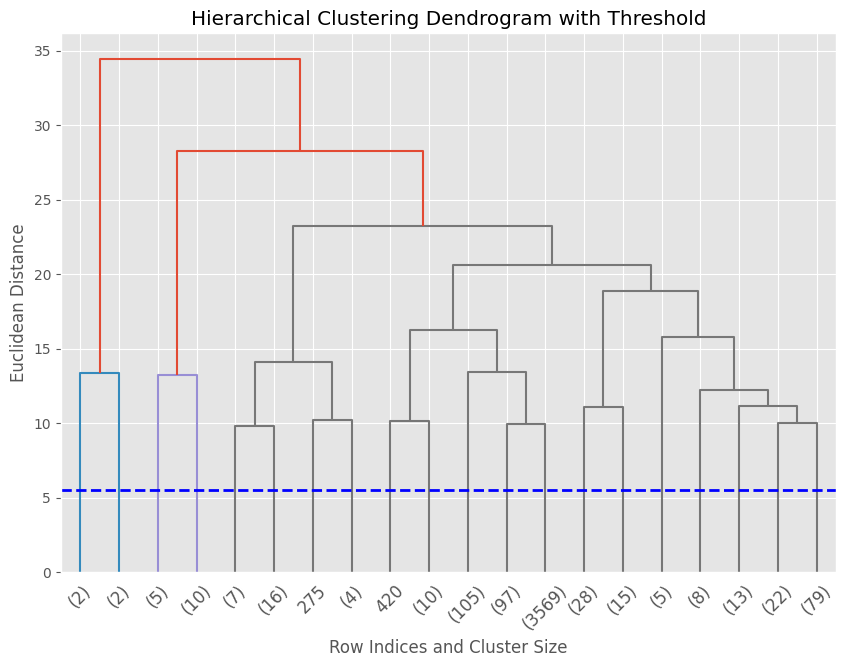

In [181]:
threshold = 5.5

cluster_labels = fcluster(linked, t=threshold, criterion='distance')
number_of_clusters = len(np.unique(cluster_labels))
print(f'Number of clusters for threshold {threshold} is {number_of_clusters}')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           truncate_mode='lastp',
           p=20,
           leaf_rotation=45,
           leaf_font_size=12)

# Threshold line
plt.axhline(y=threshold, c='blue', linestyle='--', lw=2)
plt.title('Hierarchical Clustering Dendrogram with Threshold')
plt.xlabel('Row Indices and Cluster Size')
plt.ylabel('Euclidean Distance')
plt.show()


# Question 5 (1 pt)

Explain what happens as you increase or descrease the threshold. Why? In explain in context of the horizontal line within the dendrogram.


Effect of Raising or Reducing the Threshold on Hierarchical Clustering🧾
The threshold (horizontal blue dashed line of the dendrogram) determines the number of clusters formed. The threshold may vary and influence how the dendrogram is being cut and how clusters are merged.

Increasing the threshold merges more data points into larger clusters, and decreasing it creates more fine-grained clusters by stopping merges earlier. The threshold line on the dendrogram directly controls the number of clusters, balancing generalization and detail.

# Non-Hierarchical Clustering (K-Means)

`kmeans.inertia_` attribute represents the sum of squared distances from each data point to the center of its assigned cluster (also known as the within-cluster sum of squares, or WCSS).

Lower inertia values indicate that the clusters are more compact

## Elbow

Notice we are not using the elbow method with error rate. We do not have a training and test set to get error rates for this demonstration.

- For this demonstration, we are exploring the clusters and determining the number of clusters visually by using Within Cluster Sum of Squares (How desnse or more compact the cluster is)

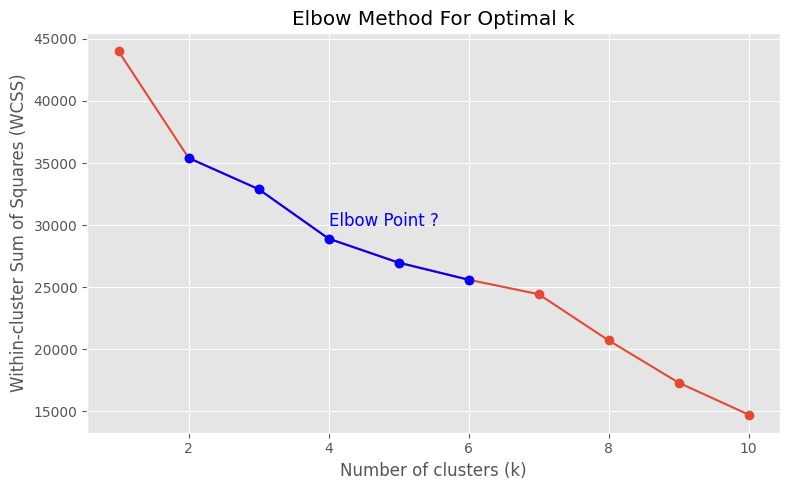

In [182]:
from sklearn.cluster import KMeans

# Within cluster sum of squares (WCSS)
wcss = []
for x in range(1, 11):
    kmeans = KMeans(n_clusters=x, random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')

# Elbow point where you see wcss flattening out
plt.plot(range(2, 7), [wcss[x] for x in range(1,6)], 'blue', marker='o')
plt.text(4, wcss[3] + 1000, 'Elbow Point ?', fontsize=12, color='blue')

plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.tight_layout()
plt.show()


# Question 6 (1 pt)

## What is an acceptable number of clusters from looking at the elbow method?

## An acceptable number of clusters based on the elbow method would be 4 or 5.

# Lets look at the Centroids to see how the clusters perform with each feature

In [183]:
# Lets just start with 5 clusters just to see how it looks.

kmeans = KMeans(n_clusters=5, random_state=13)
kmeans.fit(scaled_features_df)

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features.columns)
centroids_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.628529,-0.012228,1.484832,-0.083289,-0.051459,1.264641,0.835599,-0.073036,-0.076386,0.460754,0.439926
1,-0.162359,0.074399,-0.271813,0.033444,-0.062767,-0.268546,-0.105956,-0.039212,-0.041157,0.053104,1.298886
2,-0.300440,-0.085051,-0.549357,0.011374,-0.060328,-0.510392,-0.455988,-0.219623,-0.240689,-0.242154,-0.766919
3,1.206511,0.842902,0.112418,0.165665,-0.062767,0.648613,1.704290,3.632274,3.947206,0.285841,0.900508
4,0.639719,-0.084433,1.022084,-0.098242,15.646299,3.179691,1.714614,0.033293,0.059695,0.239873,0.337527


Text(0, 0.5, 'Centroid Values')

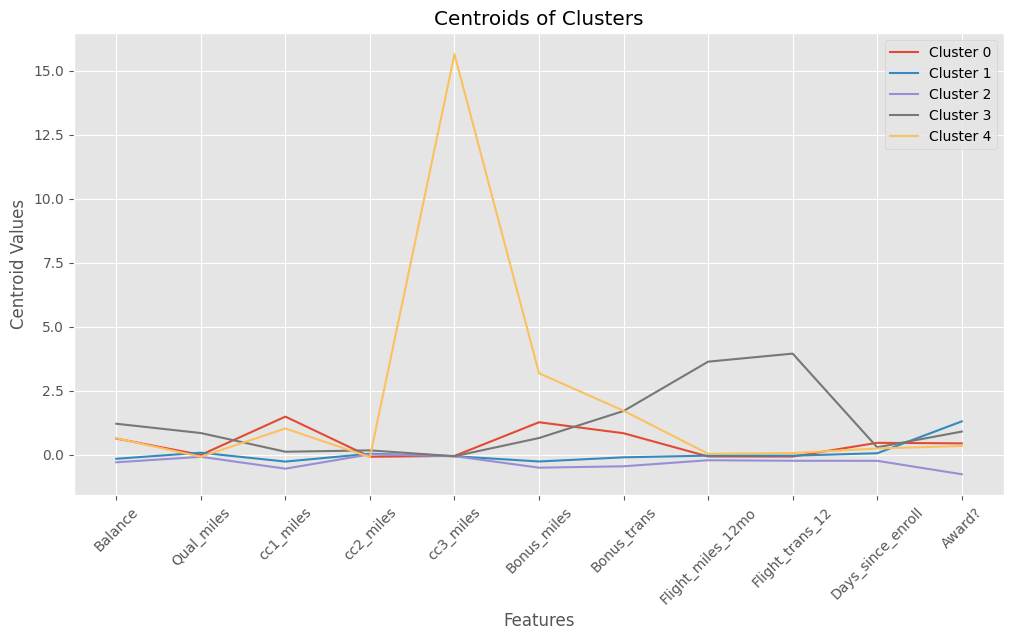

In [184]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Centroids of Clusters')
for idx, row in centroids_df.iterrows():
    plt.plot(row.index, row.values, label=f'Cluster {idx}')

plt.legend()
plt.xlabel('Features')
plt.ylabel('Centroid Values')

# Question 7 (1 pt)

## Using the above centroids visual, which cluster peforms exceptionally well for cc3_miles?

## Cluster 4 (yellow line) is performing excellent for cc3_miles as it possesses the highest peak when compared to all the other clusters.

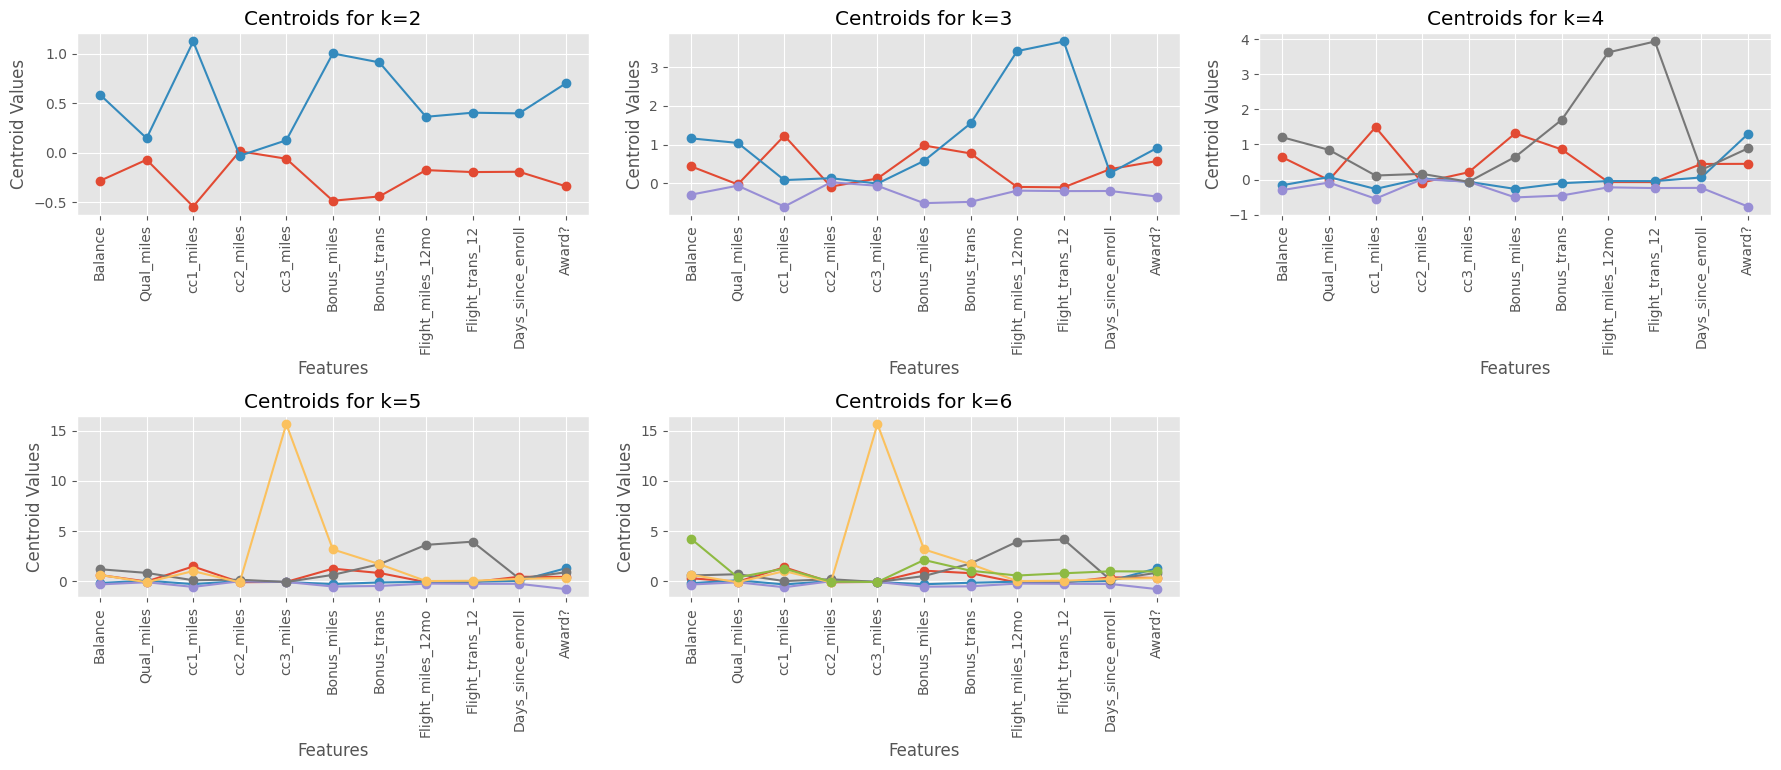

In [185]:
# Plot centroids for clusters from 2 to 6
cluster_range = range(2, 7)

plt.figure(figsize=(18, 10))
for idx, k in enumerate(cluster_range):
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(scaled_features_df)
    centroids = kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns=features.columns)

    ax = plt.subplot(3, 3, idx + 1)
    ax.set_title(f'Centroids for k={k}')
    ax.set_xlabel('Features')
    ax.set_ylabel('Centroid Values')
    ax.tick_params(axis='x', rotation=90)

    for idx, row in centroids_df.iterrows():
        ax.plot(row.index, row.values, label=f'Cluster {idx}', marker='o')

plt.tight_layout()
plt.show()

# Question 8 (2 pt)

## 1. How many clusters would you choose after looking at the above comparisons? 

## Based on centroid comparison, the optimal solution is k = 4. 


## 2. Why?
## k = 2 and k = 3 are not enough to separate clusters, since centroids for different features are extremely close and do not lead to proper segmentation.<br>
## k = 4 begins to show substantial variation in feature values between clusters, reflecting substantial segmentation.<br>
## k = 5 also improves clustering, especially with cc3_miles and bonus_miles, whose cluster centroids vary greatly.<br>
## k = 6 doesn't add much more than k = 5 and might lead to over-segmentation.<br>
## Hence, k = 5 is a fair option because it possesses good differentiation but not much complexity.<br>